


# Description
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Matrix column entries (attributes):

1. Rank - Ranking of overall sales

2.  Name - The games name

3.  Platform - Platform of the games release (i.e. PC,PS4, etc.)

4. Year - Year of the game's release

5. Genre - Genre of the game

6. Publisher - Publisher of the game

7. NA_Sales - Sales in North America (in millions)

8. EU_Sales - Sales in Europe (in millions)

9. JP_Sales - Sales in Japan (in millions)

10. Other_Sales - Sales in the rest of the world (in millions)

11. Global_Sales - Total worldwide sales.

















## Initial Data Exploration

* Find the popularity of each genre in different regions and globally
* Find global sales over the years
* Top 10 publishers
* Sales of games in different platforms
* Compare trends of different playstations and Pc over the years
* Frequency of different genres

## Feature engineeing
* Handle duplicates
* Handle outliers
* Handle missing data
* Label encoding

# Lib

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter

! pip install plotly --upgrade

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go


# ML libraries
from sklearn.preprocessing import LabelEncoder


  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


# Preview Data

In [2]:
df=pd.read_csv("E:/projects/eda on video game sales data/vgsales.csv")
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
df.shape

(16598, 11)

In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [7]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Check duplication

In [8]:
df=df.drop_duplicates(keep='first')


# Data Preprocessing

In [9]:
# null values are little so i will drop them
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [39]:
df.head()


Rank                      Name Platform  Year         Genre Publisher  \
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
5     6                    Tetris       GB  1989        Puzzle  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26

# EDA

In [12]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='green')

C:\Users\Parth Mehta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

2009 has the highest numberof game releases



-------------------------------------------------------------

**Sales of different genre in North America**

In [13]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in North America')

Text(0.5, 1.0, 'Sales of different genre in North America')

Platform and shooter games are the most played game genre in North America

---------------------------------------------------------

**Sales of different genre in Europe**

Text(0.5, 1.0, 'Sales of different genre in Europe')

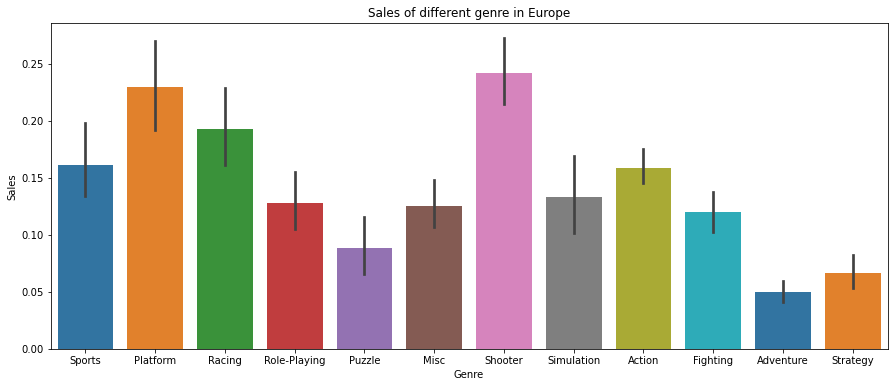

In [14]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='EU_Sales',data=df,palette='tab10')
plt.ylabel('Sales')
plt.title('Sales of different genre in Europe')

Platform and shooter games are the most played game genre in Europe



---------------------------------------------------------------

**Sales of different genre in Japan**

Text(0.5, 1.0, 'Sales of different genre in Japan')

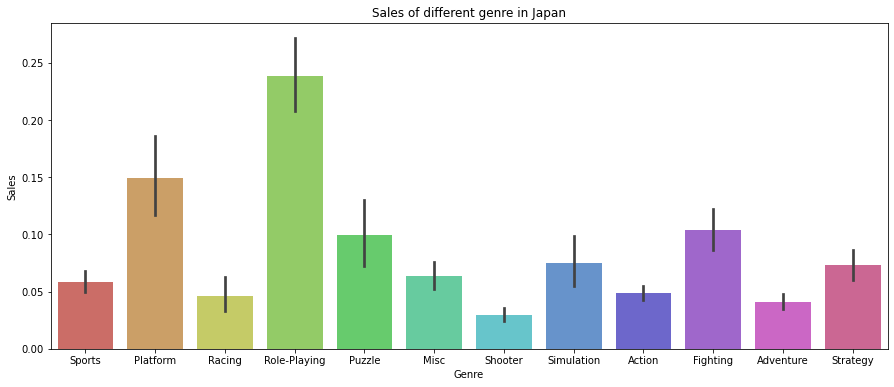

In [15]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='JP_Sales',data=df,palette='hls')
plt.ylabel('Sales')
plt.title('Sales of different genre in Japan')

Role play games are highly played in Japan



------------------------------------------------------------

**Sales of different genre in other Regions**

Text(0.5, 1.0, 'Sales of different genre in other Regions')

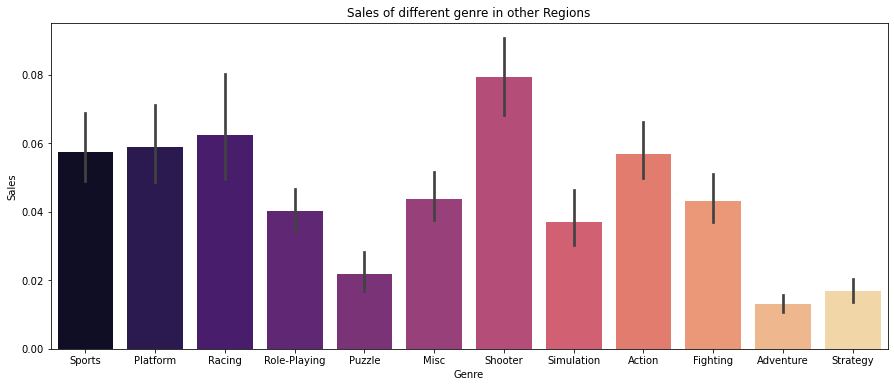

In [16]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Other_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre in other Regions')

**Sales of different genre Globally**

Text(0.5, 1.0, 'Sales of different genre Globally')

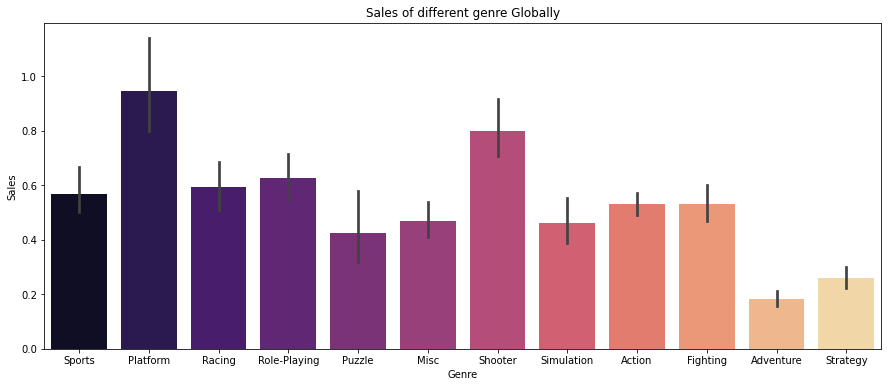

In [17]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Global_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')

Platform and shooter games are the most played game genre Globally



---------------------------------------

Frequency of different Genre



Text(0.5, 1.0, 'Frequency of different Genre')

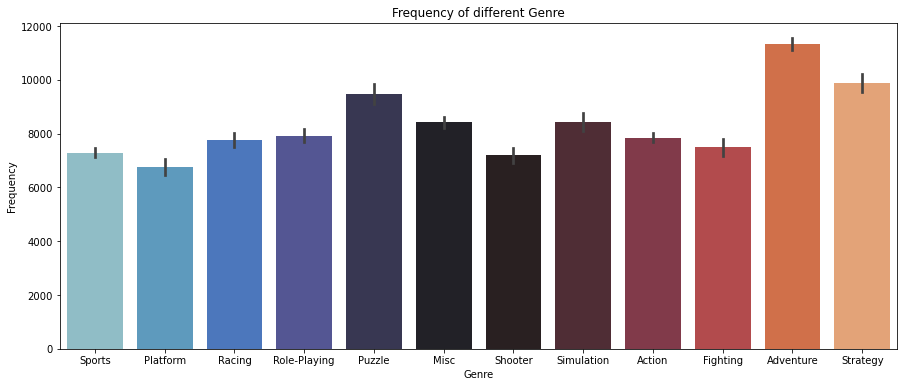

In [18]:
a=np.arange(1,16292)
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y=a,data=df,palette='icefire')
plt.ylabel('Frequency')
plt.title('Frequency of different Genre')

Adventure and strategy games are the highest in the dataset



------------------------------------------------------

Global Sales over the years



Text(0.5, 1.0, 'Global Sales over the years')

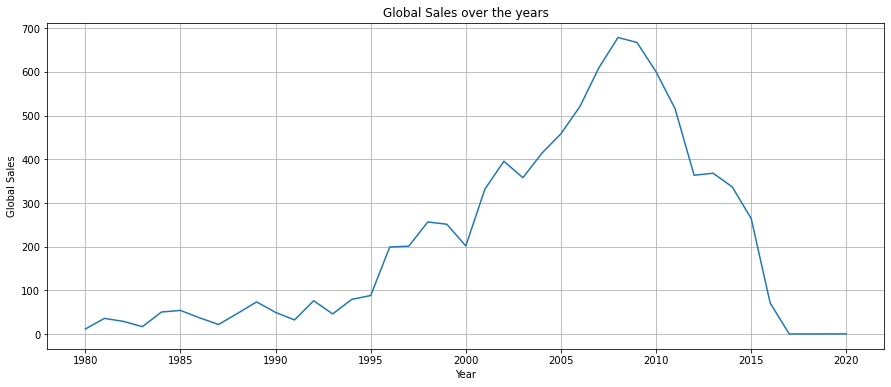

In [19]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Year'])['Global_Sales'].sum().plot()
plt.grid()
plt.ylabel('Global Sales')
plt.title('Global Sales over the years')

Highest sales have been recorded from 2007 to 2010



----------------------------------------------------------

Sales of games in different platforms globally



Text(0.5, 1.0, 'Sales of games in different platforms globally')

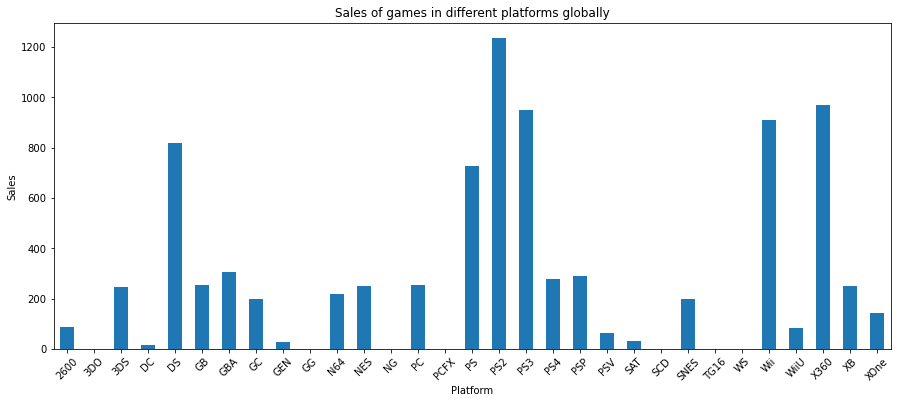

In [20]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Platform'])['Global_Sales'].sum().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.title('Sales of games in different platforms globally')

PS2 has recorded highest sales globally



----------------------------------------------------------

In [21]:
top10=df["Publisher"].value_counts().index
plt.figure(figsize = (20,10))
sns.barplot(top10[:10], df["Publisher"].value_counts().iloc[:10]
           ,palette='mako'
           ,edgecolor='black'
           )
plt.title("Most Games produced in Specific Gaming Publisher",fontsize=20)
plt.show()

C:\Users\Parth Mehta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Publisher in order and most is Electronic Arts

------------------------------------------------------------------

<AxesSubplot:xlabel='Year'>

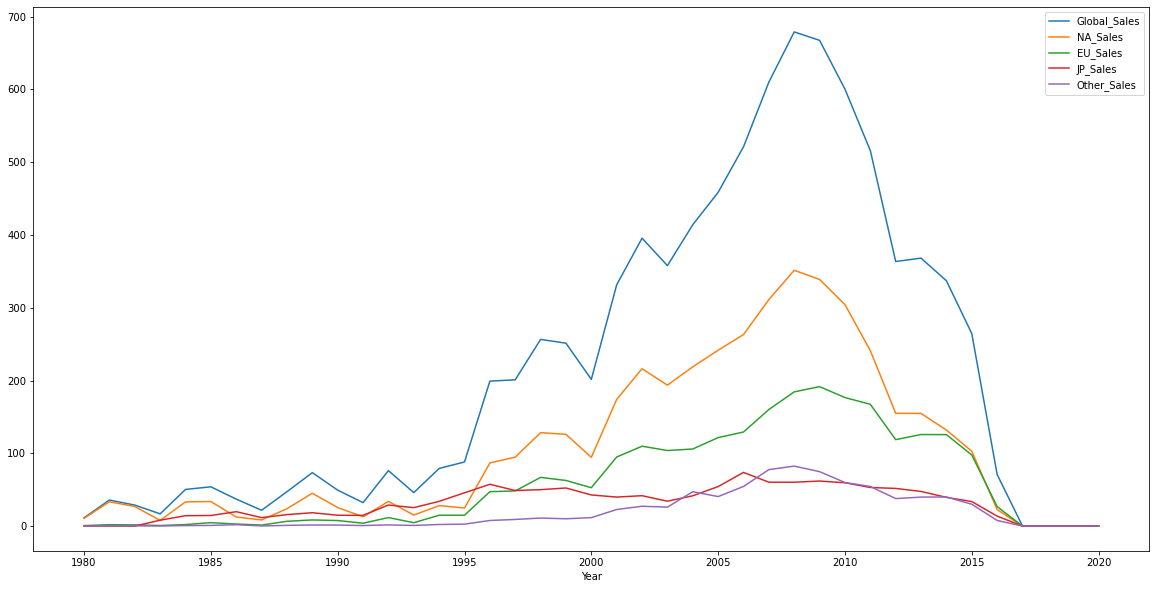

In [22]:
GSales_Year = df.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (20,10))

1. most of sales between 2005 and 2010
2. lest sales in 1980 to 1990



------------------------------------------

Playstation vs PC Global Sales Comparison¶


In [23]:
PS = df[df['Platform'] == 'PS'].groupby('Year')['Global_Sales'].sum().reset_index()
PS2 = df[df['Platform'] == 'PS2'].groupby('Year')['Global_Sales'].sum().reset_index()
PS3 = df[df['Platform'] == 'PS3'].groupby('Year')['Global_Sales'].sum().reset_index()
PS4 = df[df['Platform'] == 'PS4'].groupby('Year')['Global_Sales'].sum().reset_index()
PC = df[df['Platform'] == 'PC'].groupby('Year')['Global_Sales'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=PS['Year'], y=PS['Global_Sales'],
                         name="PS Sales",
                         hovertext=PS['Global_Sales']))

fig.add_trace(go.Scatter(x=PS2['Year'], y=PS2['Global_Sales'],
                         name="PS2 Sales",
                         hovertext=PS2['Global_Sales']))

fig.add_trace(go.Scatter(x=PS3['Year'], y=PS3['Global_Sales'],
                         name="PS3 Sales",
                         hovertext=PS3['Global_Sales']))

fig.add_trace(go.Scatter(x=PS4['Year'], y=PS4['Global_Sales'],
                         name="PS4 Sales",
                         hovertext=PS4['Global_Sales']))

fig.add_trace(go.Scatter(x=PC['Year'], y=PC['Global_Sales'],
                         name="PC Sales",
                         hovertext=PC['Global_Sales']))

fig.update_layout(title_text='Playstation vs PC Global Sales Comparison',
                  title_x=0.5, title_font=dict(size=22))  
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Global Sales (M)")

fig.show()

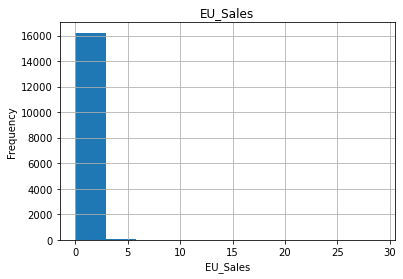

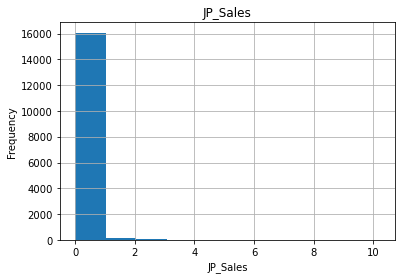

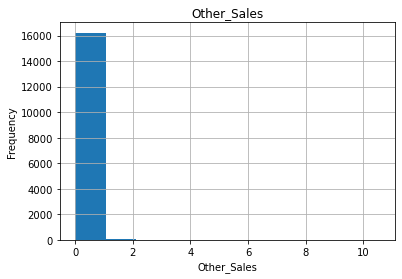

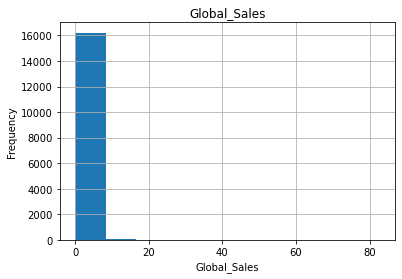

In [24]:
numerical_features=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for feature in numerical_features:
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

We can see that all of the data is right skewed

----------------------------------------------------------------------------------------------

# Dealing with Outliers

<AxesSubplot:>

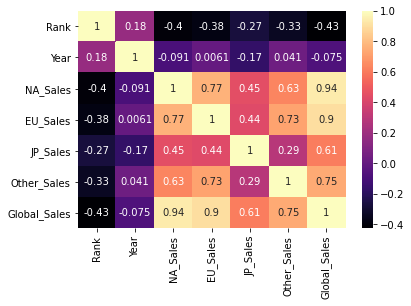

In [25]:
dfcopy=df.corr() 

sns.heatmap(dfcopy ,annot = True, cmap="magma")

Rank               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Year            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
NA_Sales         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
EU_Sales        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
JP_Sales        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Other_Sales        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Global_Sales    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

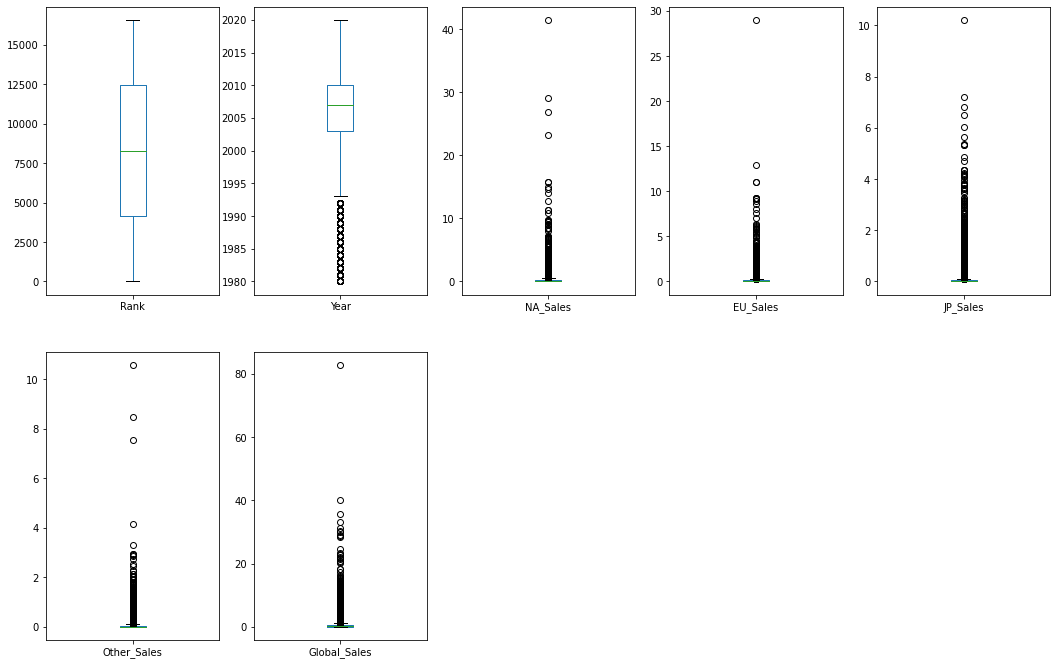

In [26]:

df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5))


C:\Users\Parth Mehta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 30.47140487188924)

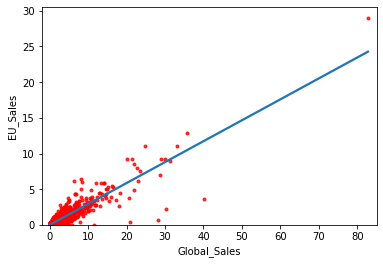

In [27]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [28]:
df = df.drop([0],axis=0) 

C:\Users\Parth Mehta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 13.52411103334368)

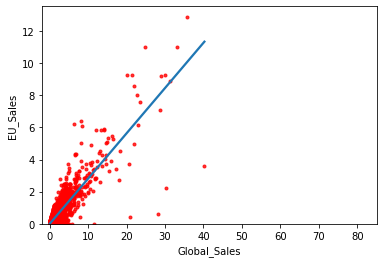

In [29]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

---------------------------------------------------------------

## Hypothesis Testing
1. Null Hypothesis - The average sales in North America and Europe Are same . 
   Alternate Hypothesis -  The average sales in North America and Europe Are same
2. Null Hypothesis - The Average sales in Japan and other regions are same .
   Alternate Hypothesis - The Average Sales in Japan and other regions are not same
3. Null Hypothesis - The average sales of activision and Electronic Arts is same . 
   Alternate Hypothesis - The average sales of activision and Electronic Arts is same
   

### We will test the first Hypothesis 



In [30]:
import scipy.stats as stats
import math
np.random.seed(6)
sample_size=750
na_sample=np.random.choice(df['NA_Sales'],sample_size)
eu_sample=np.random.choice(df['EU_Sales'],sample_size)


In [31]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(na_sample,eu_sample.mean())


In [32]:
print(p_value)

0.00018810454545361085


In [33]:
if p_value < 0.05:    
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


**Therefore,the average sales in North america and Europe are not same**

# Label Encoding and prepare X and y

In [34]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
5     6                    Tetris       GB  1989        Puzzle  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26

# 

In [35]:
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre"]


for col in feature:
    dff[col] = le.fit_transform(df[col])
    

In [36]:
dff.head()

Rank                      Name  Platform  Year  Genre Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4  Nintendo     29.08   
2     3            Mario Kart Wii        26  2008      6  Nintendo     15.85   
3     4         Wii Sports Resort        26  2009     10  Nintendo     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7  Nintendo     11.27   
5     6                    Tetris         5  1989      5  Nintendo     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

---------------------------------------------------

In [37]:
X = dff[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = dff['Global_Sales'].values

## Suggestions
* Create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution.
* Create Paiplots and check if any polynomial features need to be added or not.
* Try performing Log tranformation on skewed variables.
* Handle rare categorical variables by putting them in other category or removing them.

## Quality 
This a fairly decent data and the most important part of proccessing has been done , so it can be fit to the model . If we had the sales data over more regions like Asia , Australia then that would've helped too. 